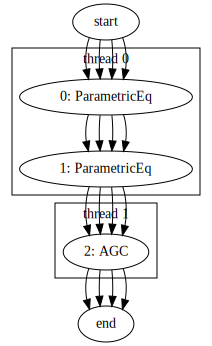

In [1]:
from dsp_ultra.design.pipeline import Pipeline
from dsp_ultra.stages.parametric_eq import ParametricEq
from dsp_ultra.stages.agc import AGC

# 4 inputs
p = Pipeline(4)

with p.add_thread() as t:
    [pe0, pe1] = t.stages((ParametricEq, ParametricEq), p.i)

with p.add_thread() as t:
    agc = t.stage(AGC, pe1.o)

p.draw()
p.validate()

In [2]:
# do tuning
pe0["filter_coeffs"] = list(range(10))
agc["gain"] = 100

from dsp_ultra.design.pipeline import send_config_to_device
send_config_to_device(p)

FileNotFoundError: [Errno 2] No such file or directory: 'xvf_host'

In [ ]:
from dsp_ultra.design.pipeline import generate_dsp_main
generate_dsp_main(p)
!cmake --build build